In [2]:
import pandas as pd
import numpy as np
import os

# Directory where the files are located
directory = 'names'

# Get a list of all the file names
file_names = [f for f in os.listdir(directory) if f.startswith('yob') and f.endswith('.txt')]

# Sort files by year to maintain chronological order
file_names = sorted(file_names, key=lambda x: int(x[3:-4]))

all_data = []

for file in file_names:
    path = os.path.join(directory, file)
    year = int(file[3:-4])  # Extract year from the file name like 'yob2019.txt'
    
    # Assuming the files have columns 'Name', 'Gender', 'Frequency'
    df = pd.read_csv(path, header=None, names=['Name', 'Gender', 'Frequency'])
    df['Year'] = year
    
    # Convert Frequency to integers
    df['Frequency'] = df['Frequency'].astype(int)
    
    # Calculate the total frequency for the year
    total_for_year = df['Frequency'].sum()
    
    # Encode the gender into each name
    df['Name'] = df['Name'] + "_" + df['Gender']
    df['Percentage'] = df['Frequency'] / total_for_year * 100
    
    # Drop the columns we don't need anymore
    df = df.drop(columns=['Frequency', 'Gender'])
    
    all_data.append(df)

# Concatenate all dataframes
data = pd.concat(all_data, ignore_index=True)

# Pivot the data to create a matrix with years as rows and gender-encoded names as columns
matrix = data.pivot_table(index='Year', columns='Name', values='Percentage', fill_value=0)

# To avoid issues with log transformations in subsequent steps
matrix += 0.0001
matrix = matrix.div(matrix.sum(axis=1), axis=0)  # Renormalize to ensure rows sum to 100% (or 1 for proportions)


Name       Aaban_M       Aabha_F       Aabid_M     Aabidah_F       Aabir_M  \
Year                                                                         
1880  8.977612e-07  8.977612e-07  8.977612e-07  8.977612e-07  8.977612e-07   
1881  8.977612e-07  8.977612e-07  8.977612e-07  8.977612e-07  8.977612e-07   
1882  8.977612e-07  8.977612e-07  8.977612e-07  8.977612e-07  8.977612e-07   
1883  8.977612e-07  8.977612e-07  8.977612e-07  8.977612e-07  8.977612e-07   
1884  8.977612e-07  8.977612e-07  8.977612e-07  8.977612e-07  8.977612e-07   
...            ...           ...           ...           ...           ...   
2018  2.687276e-06  8.977612e-07  2.431631e-06  2.175986e-06  2.175986e-06   
2019  2.451958e-06  2.451958e-06  8.977612e-07  8.977612e-07  8.977612e-07   
2020  8.977612e-07  2.244141e-06  8.977612e-07  8.977612e-07  8.977612e-07   
2021  8.977612e-07  2.225923e-06  8.977612e-07  8.977612e-07  8.977612e-07   
2022  2.767042e-06  2.232962e-06  8.977612e-07  8.977612e-07  3.

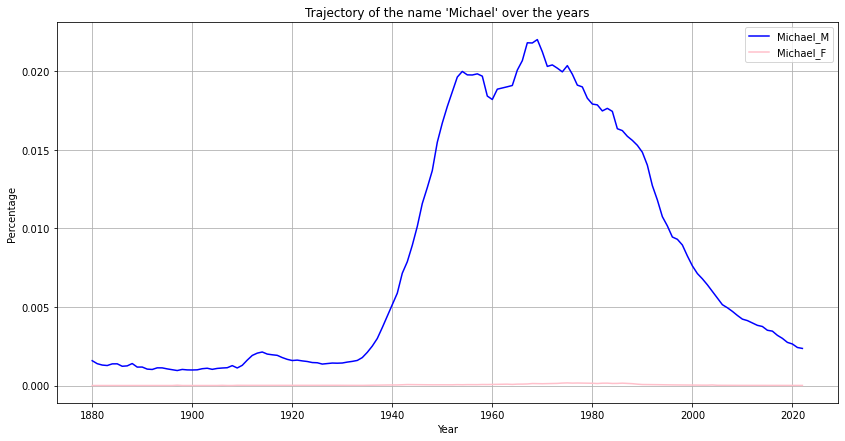

In [3]:
print(matrix)
import matplotlib.pyplot as plt

# Extract data for Michael for both genders
michael_m = matrix["Michael_M"]
michael_f = matrix["Michael_F"]

# Plot
plt.figure(figsize=(14,7))
plt.plot(michael_m.index, michael_m.values, label="Michael_M", color="blue")
plt.plot(michael_f.index, michael_f.values, label="Michael_F", color="pink")
plt.title("Trajectory of the name 'Michael' over the years")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend()
plt.grid(True)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library

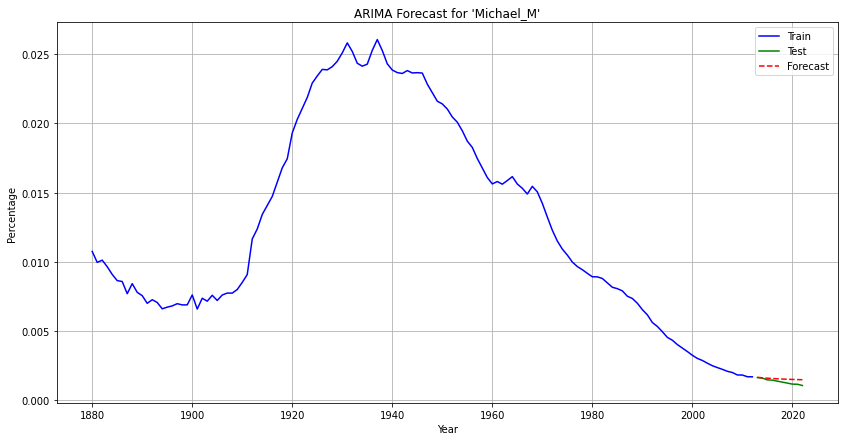

In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Let's use Michael_M as an example
data = matrix["Robert_M"].dropna()

# Split into train and test sets
train = data.iloc[:-10]  # Using last 10 years for validation
test = data.iloc[-10:]

# Fit ARIMA model. Order (p,d,q) can be determined using ACF/PACF plots or other methods
# For simplicity, let's use (1,1,1). You might want to optimize this using grid search or other means.
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=10)

# Plotting
plt.figure(figsize=(14,7))
plt.plot(train.index, train.values, label="Train", color="blue")
plt.plot(test.index, test.values, label="Test", color="green")
plt.plot(test.index, forecast, label="Forecast", color="red", linestyle="--")
plt.title("ARIMA Forecast for 'Michael_M'")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend()
plt.grid(True)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/

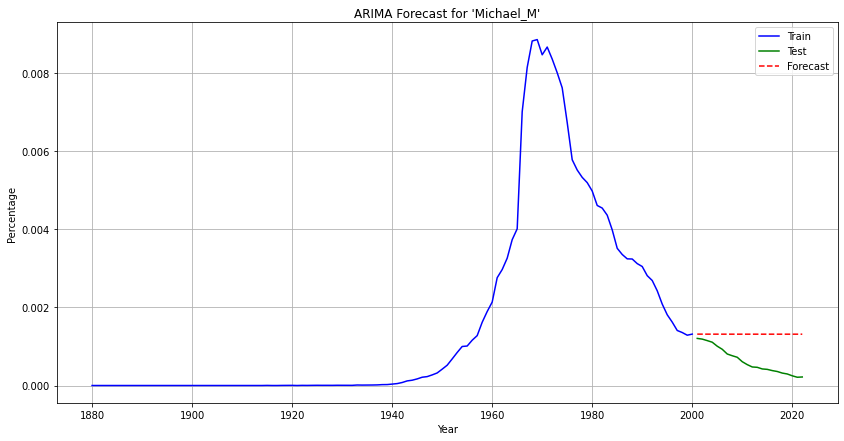

In [5]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Let's use Michael_M as an example
data = matrix["Michelle_F"].dropna()

# Split into train and test sets based on the year 2000
train = data[data.index <= 2000]
test = data[data.index > 2000]

# Fit ARIMA model. Order (p,d,q) can be determined using ACF/PACF plots or other methods
# For simplicity, let's use (1,1,1). You might want to optimize this using grid search or other means.
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plotting
plt.figure(figsize=(14,7))
plt.plot(train.index, train.values, label="Train", color="blue")
plt.plot(test.index, test.values, label="Test", color="green")
plt.plot(test.index, forecast, label="Forecast", color="red", linestyle="--")
plt.title("ARIMA Forecast for 'Michael_M'")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend()
plt.grid(True)
plt.show()


# Entropy change

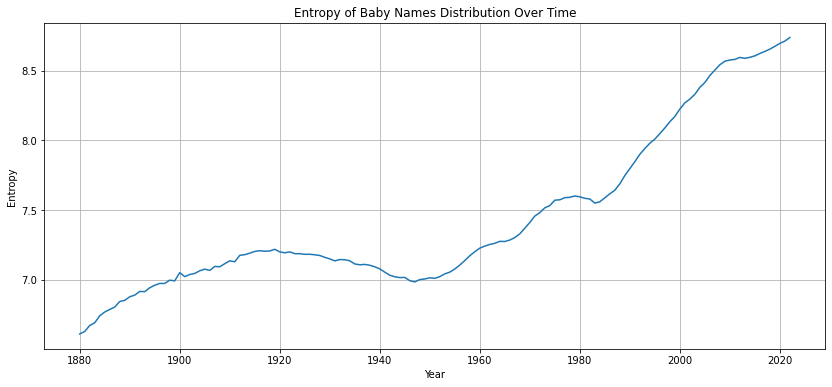

In [21]:
import matplotlib.pyplot as plt

# Calculate entropy for each year
matrix['Entropy'] = -np.sum(matrix * np.log(matrix), axis=1)  # Added a small constant to handle log(0)

# Plot entropy over the years
plt.figure(figsize=(14, 6))
plt.plot(matrix.index, matrix['Entropy'])
plt.title('Entropy of Baby Names Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Entropy')
plt.grid(True)
plt.show()


Interestingly this aligns with gdp quiet well